# Prerequisites

In [42]:
colab = True
if colab:
    !git clone https://github.com/jgbeni/BirdPics.git
    !mv BirdPics/utils .
    !mv BirdPics/models .
    !rm -rf BirdPics
    from google.colab import drive
    drive.mount('/content/drive')

    data_dir = '/content/drive/MyDrive/BirdPics/data'

else:
    data_dir = './data'

Cloning into 'BirdPics'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 219 (delta 19), reused 24 (delta 16), pack-reused 187 (from 1)
Receiving objects: 100% (219/219), 8.85 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Filtering content: 100% (3/3), 1.10 GiB | 14.21 MiB/s, done.
mv: cannot move 'BirdPics/utils' to './utils': Directory not empty
mv: cannot move 'BirdPics/models' to './models': Directory not empty
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import h5py
import utils.model_eval as model_eval
import utils.data_preprocessing as dp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Evaluating the training process

## Loss and accuracy curves for VGG16

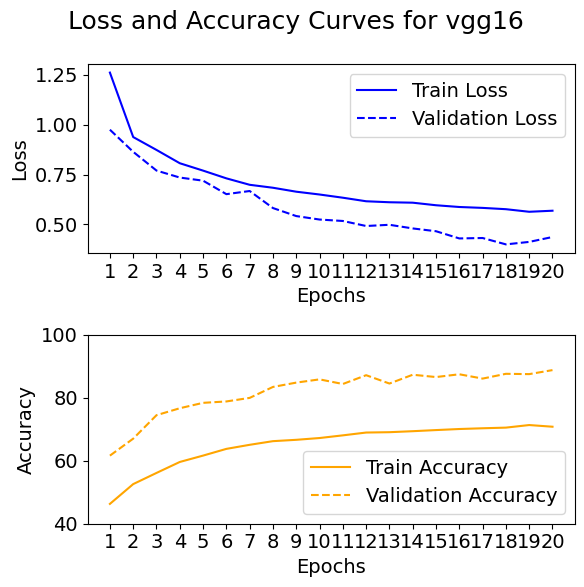

In [44]:
model_names = 'vgg16'
evaluator = model_eval.loss_acc_loader(model_names)
evaluator.plot_loss_acc()


## Loss and accuracy curves for VGG19

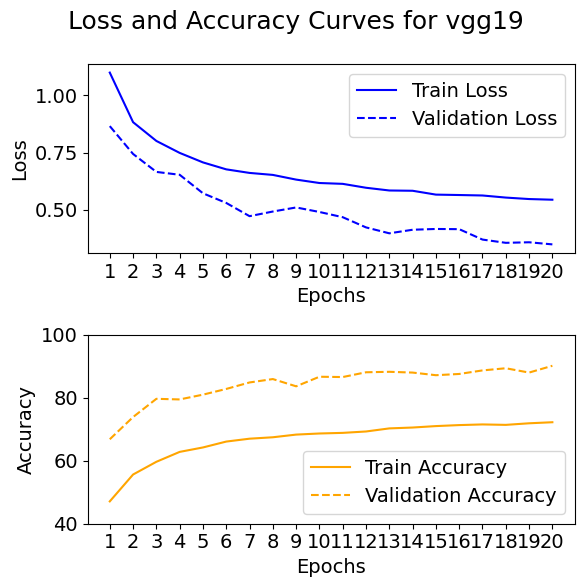

In [45]:
model_names = 'vgg19'
evaluator = model_eval.loss_acc_loader(model_names)
evaluator.plot_loss_acc()

## Loss and accuracy curves for ResNet50

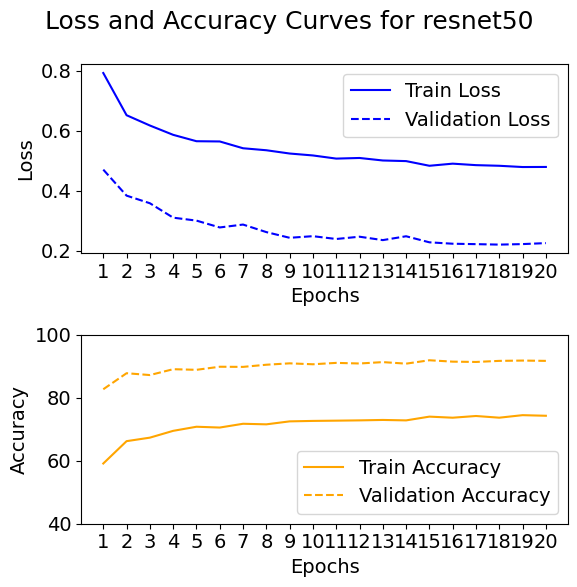

In [46]:
model_names = 'resnet50'
evaluator = model_eval.loss_acc_loader(model_names)
evaluator.plot_loss_acc()

# Evaluating the Test Set

In [47]:
# Load test data
with h5py.File(data_dir+'/bird_data.hdf5', 'r') as f:
    X_test = np.copy(f['test']['X'])
    Y_test = np.copy(f['test']['Y'])

In [48]:
# Define model names to evaluate
model_names = ['vgg16','vgg19','resnet50']

# Initialize arrays to store results
all_accuracies = np.zeros(len(model_names),dtype=np.float32)
all_class_acc = np.zeros((len(model_names),len(np.unique(Y_test))),dtype=np.float32)
all_labels = np.zeros((len(model_names),len(Y_test)),dtype=np.int32)
all_predictions = np.zeros((len(model_names),len(Y_test)),dtype=np.int32)

# Evaluate each model
for i in range(len(model_names)):
    print('Evaluating model:',model_names[i])

    model_loader = model_eval.load_model(model_names[i])
    model = model_loader.get_model() # Load the model

    # Evaluate the model on the test set
    accuracy, class_acc, labels, predictions = model_eval.eval_model(model, X_test, Y_test)

    # Store the values
    all_accuracies[i] = accuracy
    all_class_acc[i,:] = class_acc
    all_labels[i,:] = labels
    all_predictions[i,:] = predictions


Evaluating model: vgg16


100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


Overall Accuracy of the model on the test images: 88.72549019607843 %
Accuracy of swallow: 85.54572271386431 %
Accuracy of swift: 95.68345323741008 %
Accuracy of martin: 84.70764617691154 %
Evaluating model: vgg19


100%|██████████| 32/32 [00:13<00:00,  2.36it/s]


Overall Accuracy of the model on the test images: 89.26470588235294 %
Accuracy of swallow: 90.56047197640117 %
Accuracy of swift: 95.53956834532374 %
Accuracy of martin: 81.40929535232384 %
Evaluating model: resnet50


100%|██████████| 32/32 [00:07<00:00,  4.32it/s]

Overall Accuracy of the model on the test images: 92.74509803921569 %
Accuracy of swallow: 90.41297935103245 %
Accuracy of swift: 94.67625899280576 %
Accuracy of martin: 93.10344827586206 %


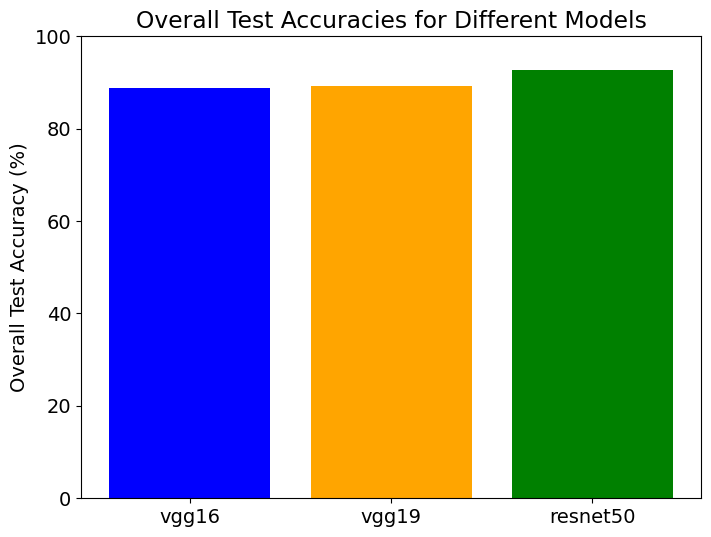

In [49]:
# Plot overall accuracies
plt.figure(figsize=(8,6))
plt.bar(model_names, all_accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 100)
plt.ylabel('Overall Test Accuracy (%)')
plt.title('Overall Test Accuracies for Different Models')
plt.show()

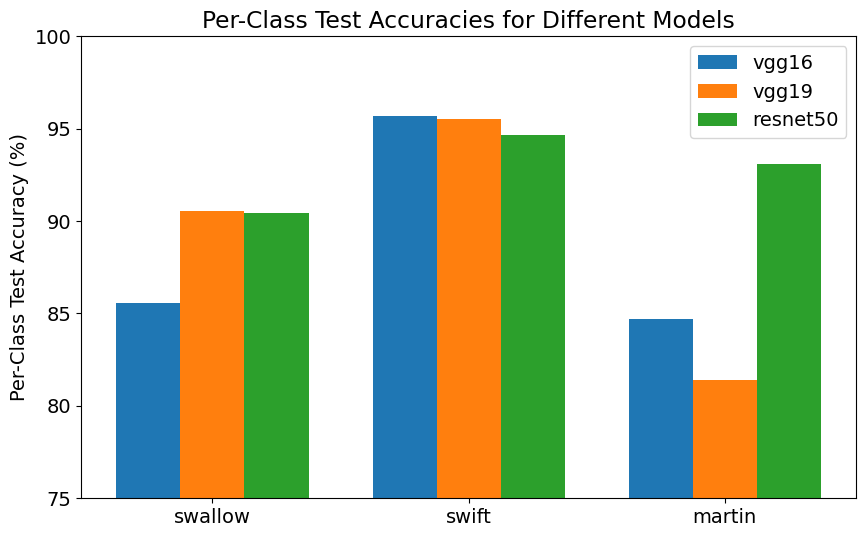

In [50]:
#Plot per-class accuracies
classes = ['swallow', 'swift', 'martin']

plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = 14
bar_width = 0.25
x = np.arange(len(np.unique(Y_test)))
for i in range(len(model_names)):
    plt.bar(x + i*bar_width, all_class_acc[i,:], width=bar_width, label=model_names[i])
plt.xticks(x + bar_width, classes)
plt.ylim(75, 100)
plt.ylabel('Per-Class Test Accuracy (%)')
plt.title('Per-Class Test Accuracies for Different Models')
plt.legend(loc='upper right')
plt.show()

## Confusion matrix for VGG16

Normalized confusion matrix
[[0.85545723 0.03834808 0.10619469]
 [0.01582734 0.95683453 0.02733813]
 [0.10494753 0.04797601 0.84707646]]


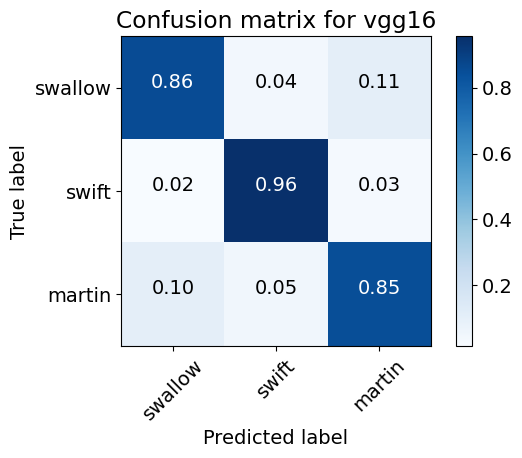

In [51]:
title = 'Confusion matrix for %s' %(model_names[0])
model_eval.plot_confusion_matrix(all_labels[0,:], all_predictions[0,:], classes, normalize=True, title=title)

## Confusion matrix for VGG19

Normalized confusion matrix
[[0.90560472 0.02654867 0.06784661]
 [0.02014388 0.95539568 0.02446043]
 [0.12143928 0.06446777 0.81409295]]


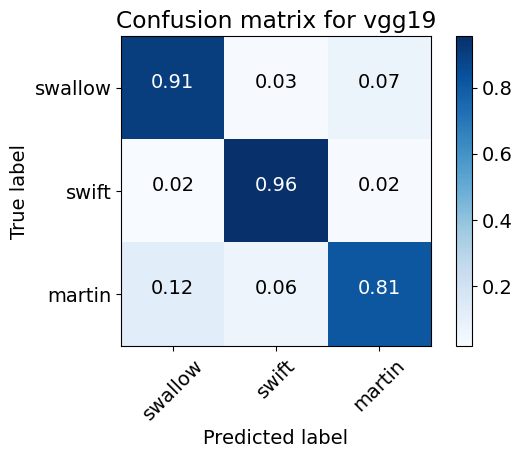

In [52]:
title = 'Confusion matrix for %s' %(model_names[1])
model_eval.plot_confusion_matrix(all_labels[1,:], all_predictions[1,:], classes, normalize=True, title=title)

## Confusion matrix for ResNet50

Normalized confusion matrix
[[0.90412979 0.00884956 0.08702065]
 [0.0057554  0.94676259 0.04748201]
 [0.05097451 0.017991   0.93103448]]


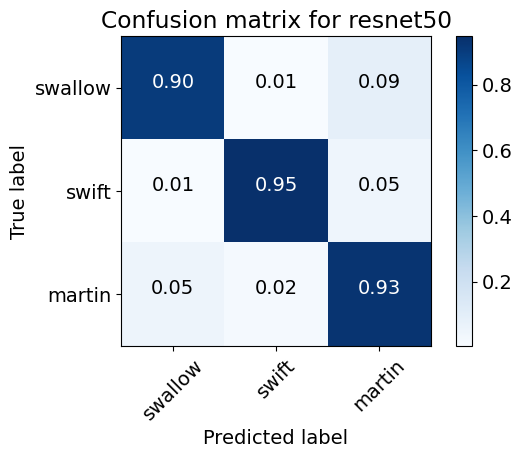

In [53]:
title = 'Confusion matrix for %s' %(model_names[2])
model_eval.plot_confusion_matrix(all_labels[2,:], all_predictions[2,:], classes, normalize=True, title=title)

# Summary and insights